In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("FAU_Bank_Employee_Performance.csv", sep = ',')

#### Data cleaning

In [3]:
df.isnull().values.any()

False

In our case, there are no missing data. However, if it would be the case, we would need to go deeper into the data cleaning process.

In [4]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

Let's take a look at the first rows of the dataset to get some understanding of how it looks like.

In [5]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Business,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


Text(0, 0.5, 'number of employees')

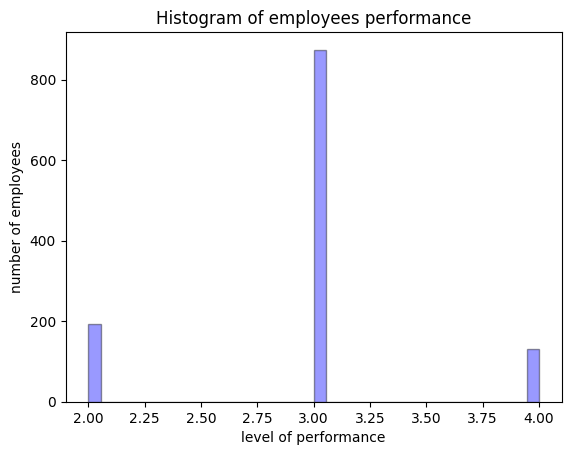

In [7]:
# Import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['PerformanceRating'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of employees performance')
plt.xlabel('level of performance')
plt.ylabel('number of employees')

Text(0, 0.5, 'number of employees')

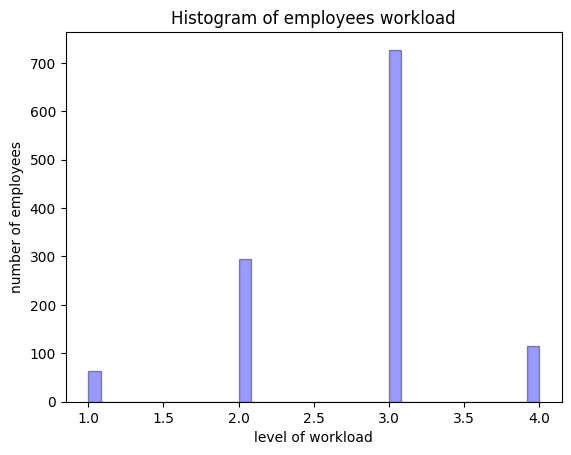

In [8]:
sns.distplot(df['EmpWorkLifeBalance'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of employees workload')
plt.xlabel('level of workload')
plt.ylabel('number of employees')


In [9]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [12]:
df_ml=pd.concat([df_cat,df_num],axis=1)
df_ml.head()

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,Age,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,0,1,3,2,5,13,2,0,0,32,...,12,4,10,2,2,10,7,0,8,3
1,1,1,3,2,5,13,2,0,0,47,...,12,4,20,2,3,7,7,1,7,3
2,2,1,0,1,5,13,1,1,0,40,...,21,3,20,2,3,18,13,1,12,4
3,3,1,2,0,3,8,2,0,0,41,...,15,2,23,2,2,21,6,12,6,3
4,4,1,3,2,5,13,2,0,0,60,...,14,4,10,1,3,2,2,2,2,3


In [13]:
corr=df_ml.corr()

In [14]:
corr

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,Age,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
EmpNumber,1.000000,0.025922,0.016785,-0.038128,-0.234279,-0.020134,0.050270,0.007214,-0.020210,-0.053137,...,-0.017925,0.033013,-0.008414,0.020264,0.006075,-0.005061,0.002596,0.004240,0.010905,-0.003163
Gender,0.025922,1.000000,0.017677,-0.042169,-0.010925,-0.004497,-0.043608,-0.038410,0.035758,-0.040107,...,-0.005319,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,-0.001780
EducationBackground,0.016785,0.017677,1.000000,-0.001247,0.159565,0.103223,0.029229,0.005714,0.086528,-0.045524,...,-0.016712,0.003016,-0.031182,-0.007414,0.032219,-0.008626,0.014740,-0.011050,0.015457,-0.001277
MaritalStatus,-0.038128,-0.042169,-0.001247,1.000000,0.067272,0.038857,0.028520,-0.022833,0.162969,-0.098368,...,0.010128,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.024172
EmpDepartment,-0.234279,-0.010925,0.159565,0.067272,1.000000,0.506440,-0.045233,-0.026841,0.048006,-0.000104,...,-0.012661,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,-0.162615
EmpJobRole,-0.020134,-0.004497,0.103223,0.038857,0.506440,1.000000,-0.082632,0.018268,0.044723,-0.044424,...,0.008116,-0.039484,-0.053910,0.000616,-0.014453,-0.013846,0.014363,0.002596,-0.003880,-0.084006
BusinessTravelFrequency,0.050270,-0.043608,0.029229,0.028520,-0.045233,-0.082632,1.000000,0.032229,0.007217,0.040579,...,-0.041946,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,-0.031025
OverTime,0.007214,-0.038410,0.005714,-0.022833,-0.026841,0.018268,0.032229,1.000000,0.224535,0.051910,...,-0.000778,0.034146,0.044233,-0.061398,-0.027968,0.004295,-0.015674,0.000261,-0.028447,0.050206
Attrition,-0.020210,0.035758,0.086528,0.162969,0.048006,0.044723,0.007217,0.224535,1.000000,-0.189317,...,-0.009448,-0.037179,-0.185226,-0.035047,-0.068624,-0.142456,-0.173895,-0.057199,-0.158745,-0.039796
Age,-0.053137,-0.040107,-0.045524,-0.098368,-0.000104,-0.044424,0.040579,0.051910,-0.189317,1.000000,...,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164


In [15]:
corr["PerformanceRating"]

EmpNumber                      -0.003163
Gender                         -0.001780
EducationBackground            -0.001277
MaritalStatus                   0.024172
EmpDepartment                  -0.162615
EmpJobRole                     -0.084006
BusinessTravelFrequency        -0.031025
OverTime                        0.050206
Attrition                      -0.039796
Age                            -0.040164
DistanceFromHome               -0.046142
EmpEducationLevel               0.020529
EmpEnvironmentSatisfaction      0.395561
EmpHourlyRate                  -0.043116
EmpJobInvolvement              -0.010539
EmpJobLevel                    -0.076632
EmpJobSatisfaction              0.000606
NumCompaniesWorked              0.020980
EmpLastSalaryHikePercent        0.333722
EmpRelationshipSatisfaction    -0.019502
TotalWorkExperienceInYears     -0.068141
TrainingTimesLastYear          -0.005443
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.111645
ExperienceYearsI

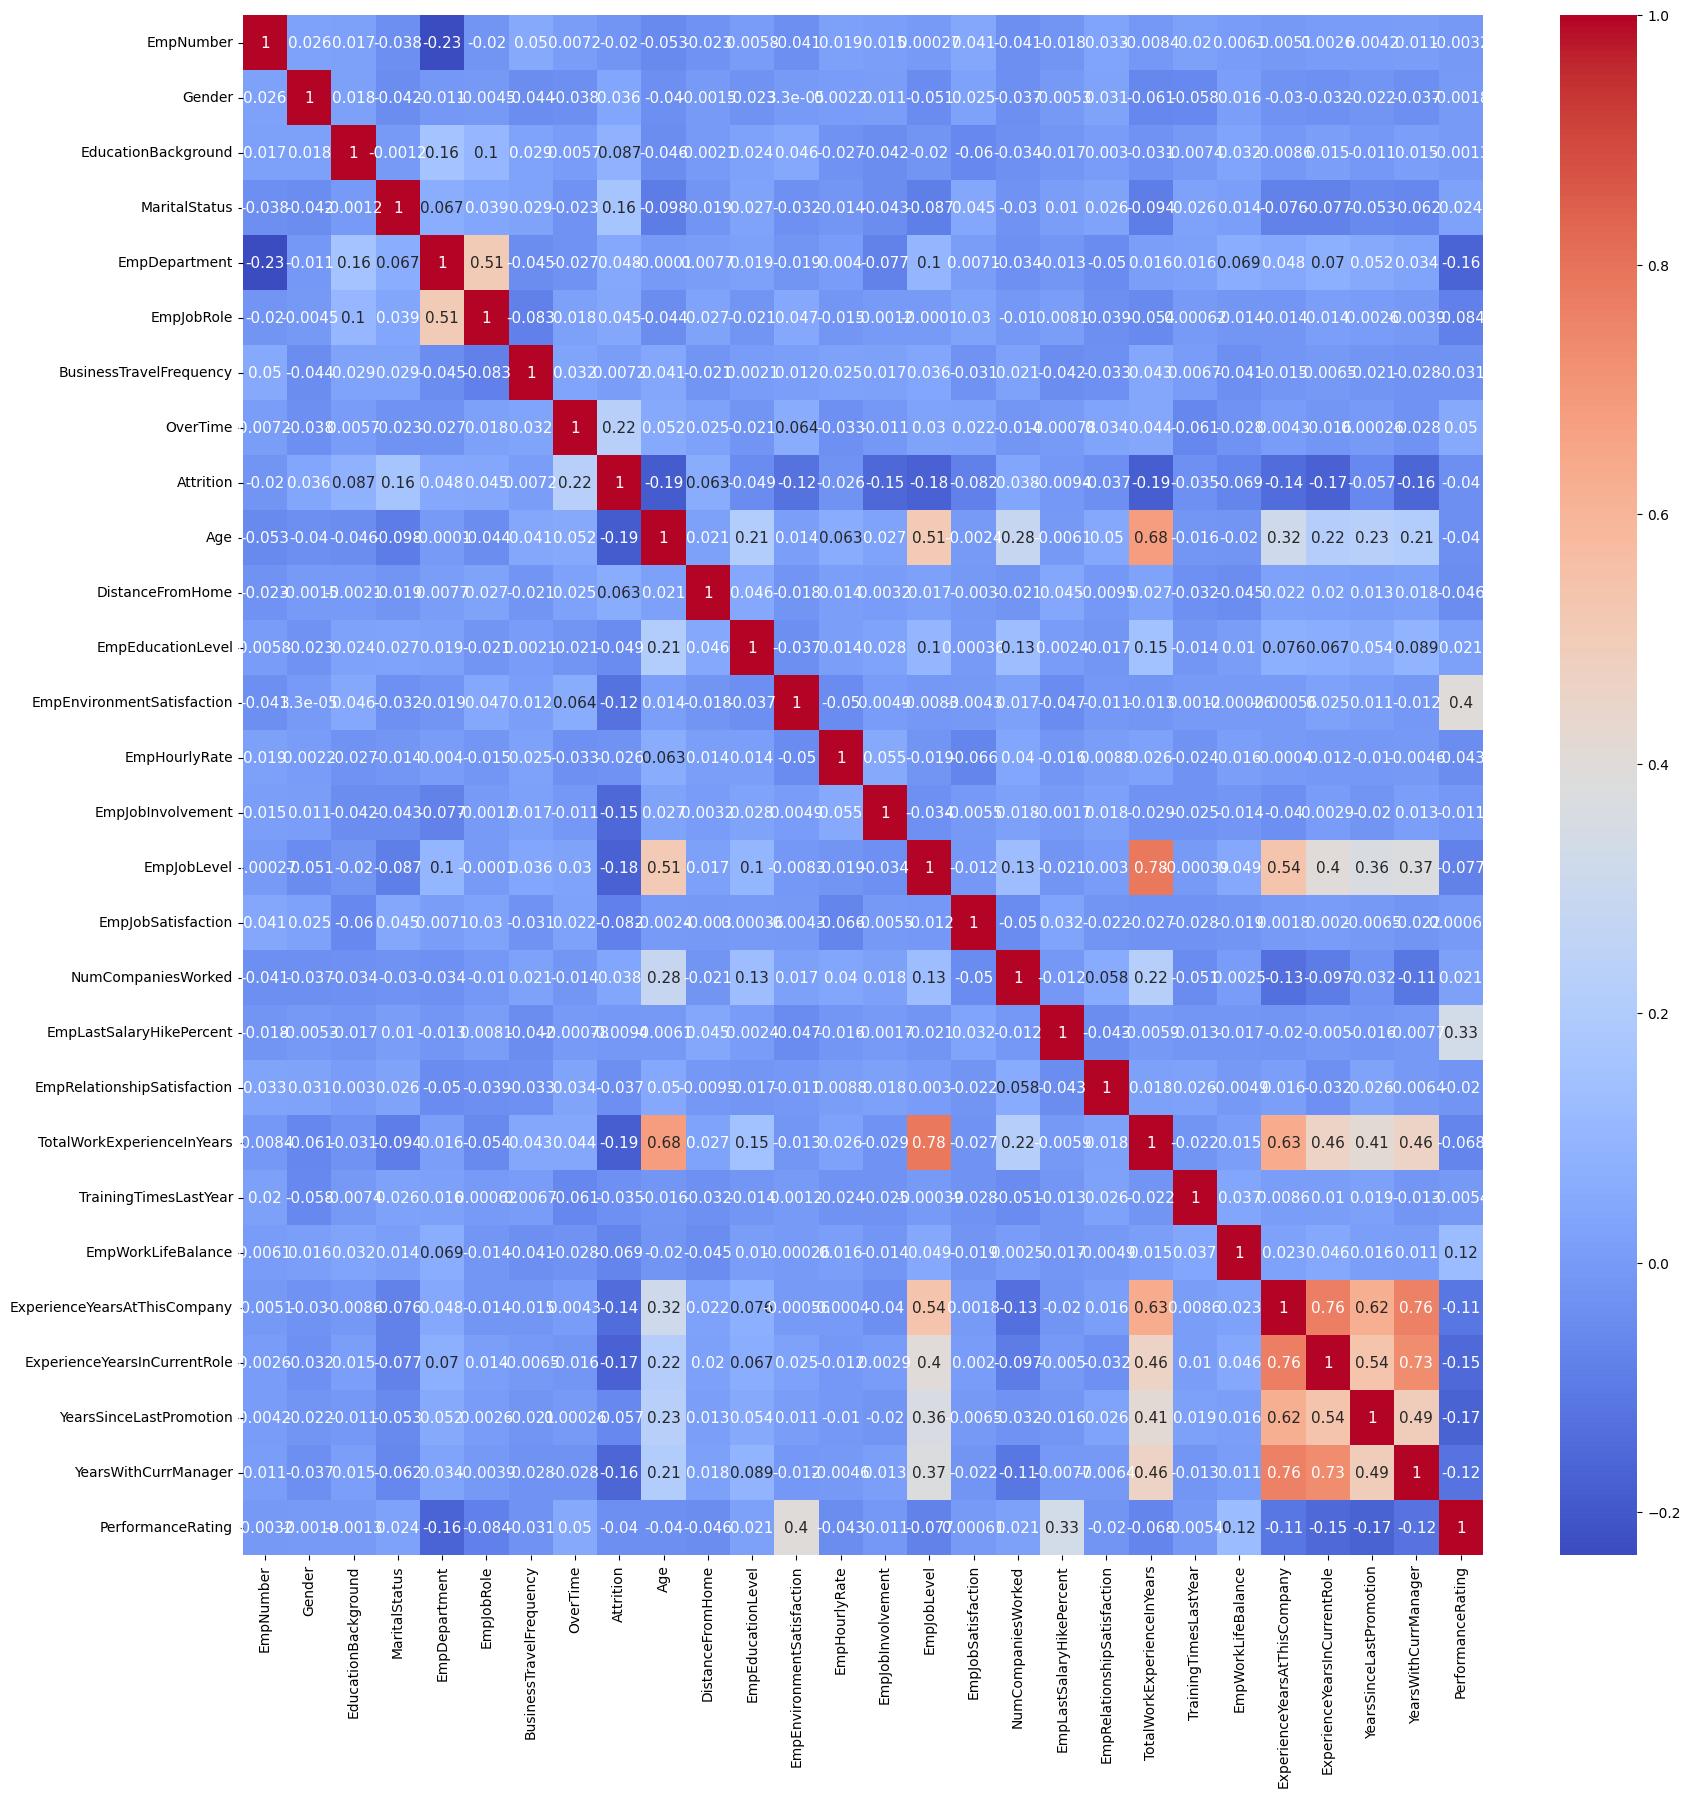

In [16]:
#display the corr matrix in heat map
corr=df_ml.corr()
plt.figure(figsize=(20,20))
ax=sns.heatmap(corr,annot=True, annot_kws={'size':11},cmap='coolwarm')
fig1=ax.figure
fig1.savefig("correlation map.jpg")


In [17]:
x = df_ml.drop(['PerformanceRating'], axis=1)
y = df_ml['PerformanceRating']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.ensemble import RandomForestClassifier
ml =RandomForestClassifier()
ml.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = ml.predict(x_test)
predicted_value = ml.predict([[0,1,3,2,5,13,1,0,47,21,3,20,2,3,18,7,1,12,4,7,6,5,5,1,7,2,10]])
actual_value = df_ml.loc[0,'PerformanceRating']

print(predicted_value, actual_value)

[3] 3


### Evaluate the model

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8193636674649332

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 31,   2,   0],
       [  2, 175,   2],
       [  0,   5,  23]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print('Accuracy score for RandomForest:',accuracy_score(y_test,y_pred))

Accuracy score for RandomForest: 0.9541666666666667


In [24]:
from sklearn.metrics import classification_report
Evaluation=classification_report(y_test,y_pred)
print(Evaluation)

              precision    recall  f1-score   support

           2       0.94      0.94      0.94        33
           3       0.96      0.98      0.97       179
           4       0.92      0.82      0.87        28

    accuracy                           0.95       240
   macro avg       0.94      0.91      0.93       240
weighted avg       0.95      0.95      0.95       240



We see that r2 score is very high, close to 1 so our model is appropriate to predict the performance of employees.

In [25]:
pred_y_df = pd.DataFrame({'y_act': y_test, 'y_pred': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:5]

,y_act,y_pred,Difference
198,3,3,0
328,3,3,0
45,3,3,0
263,3,3,0
621,3,3,0


We see that the model is pretty accurate as the differences are small. 

### Print a summary of the model

Print a summary of the model using "statsmodels", and try to find out which of the independent attributes has the higher weight in performance prediction by looking at the coef. values.

In [26]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS               Adj. R-squared (uncentered): 0.978    
Dependent Variable:     PerformanceRating AIC:                         1471.5148
Date:                   2024-06-30 04:01  BIC:                         1608.9469
No. Observations:       1200              Log-Likelihood:              -708.76  
Df Model:               27                F-statistic:                 1997.    
Df Residuals:           1173              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.979             Scale:                       0.19518  
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
EmpNumber                         0.0001   0.0000  1.5829 0.1137 -0.0000  0.0001
Gender                            0.0268   0.0262  1.

We can conclude that model works thanks to a high adjusted R-squared and all the attritutes except for home_office have almost the same influence on performance.